# Predict the onset of diabetes based on diagnostic measures


## About the Dataset
    The datasets consist of several medical predictor (independent) variables and one target (dependent) variable,
    Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age,
    and so on.

### Columns
    Pregnancies: Number of times pregnant
    Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure : Diastolic blood pressure (mm Hg)
    SkinThickness : Triceps skin fold thickness (mm)
    Insulin : 2-Hour serum insulin (mu U/ml)
    BMI : Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction : It provided some data on diabetes mellitus history in relatives and the genetic relationship
                               of those relatives to the patient.
    Age : Age (years)
    Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

### Task:
        To build a machine learning model to accurately predict whether or not the patients in the dataset
        have diabetes or not?


In [87]:
#importing Libraries
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#for warning 
from warnings import filterwarnings
filterwarnings("ignore")


NameError: name 'sklearn' is not defined

In [4]:
#Load the dataset
data = pd.read_csv("diabetes.csv")

## Data Exploration

In [5]:
data.shape

(767, 9)

In [6]:
len(data)

767

In [7]:
data.ndim,data.size

(2, 6903)

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data["Outcome"].value_counts()

0    499
1    268
Name: Outcome, dtype: int64

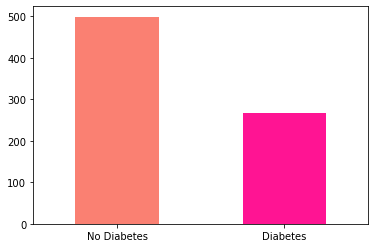

In [13]:
data["Outcome"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [72]:
# Calculate the median value for BMI
mean_bmi = data['BMI'].mean()
# Substitute it in the BMI column of the
# dataset where values are 0
data['BMI'] = data['BMI'].replace(
    to_replace=0, value=mean_bmi)

mean_bloodp = data['BloodPressure'].mean()
# Substitute it in the BloodP column of the
# dataset where values are 0
data['BloodPressure'] = data['BloodPressure'].replace(
    to_replace=0, value=mean_bloodp)

# Calculate the median value for PlGlcConc
mean_plglcconc = data['Glucose'].mean()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
data['Glucose'] = data['Glucose'].replace(
    to_replace=0, value=mean_plglcconc)

# Calculate the median value for SkinThick
mean_skinthick = data['SkinThickness'].mean()
# Substitute it in the SkinThick column of the
# dataset where values are 0
data['SkinThickness'] = data['SkinThickness'].replace(
    to_replace=0, value=mean_skinthick)

# Calculate the median value for SkinThick
mean_skinthick =data['Insulin'].mean()
# Substitute it in the SkinThick column of the
# dataset where values are 0
data['Insulin'] = data['Insulin'].replace(
    to_replace=0, value=mean_skinthick)

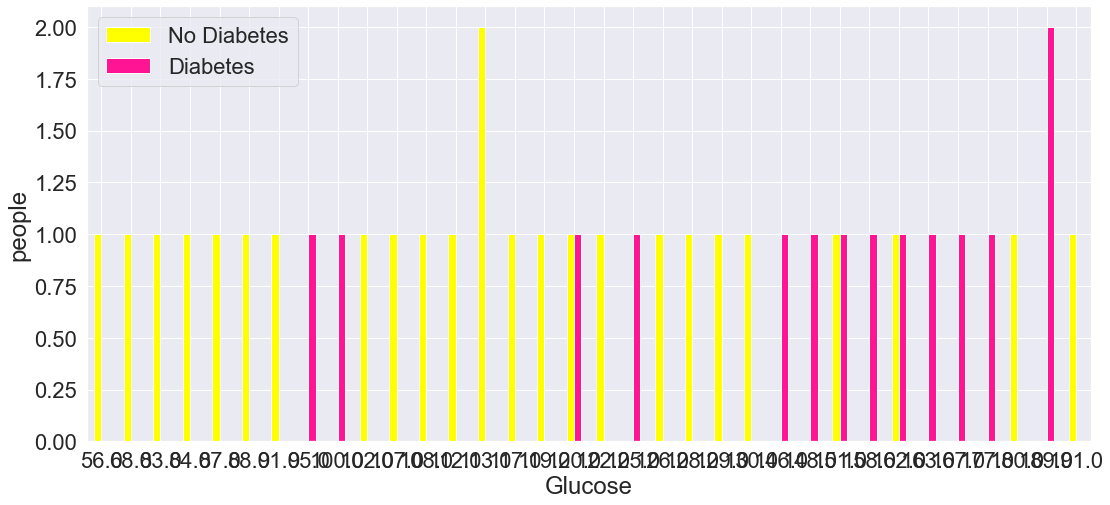

In [75]:
# Comparing Glucose with the Outcome
pd.crosstab(data.Glucose[::20],data.Outcome).plot(kind="bar",figsize=(18,8),color=["yellow","deeppink"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

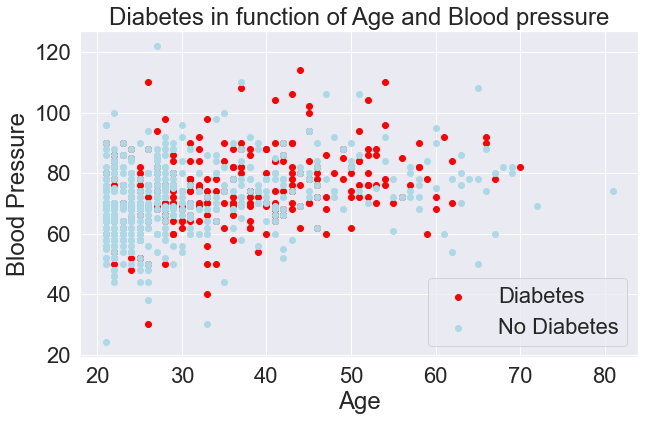

In [76]:
#finding out the Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="Red");

# Scatter with negative example
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="lightblue");

# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);


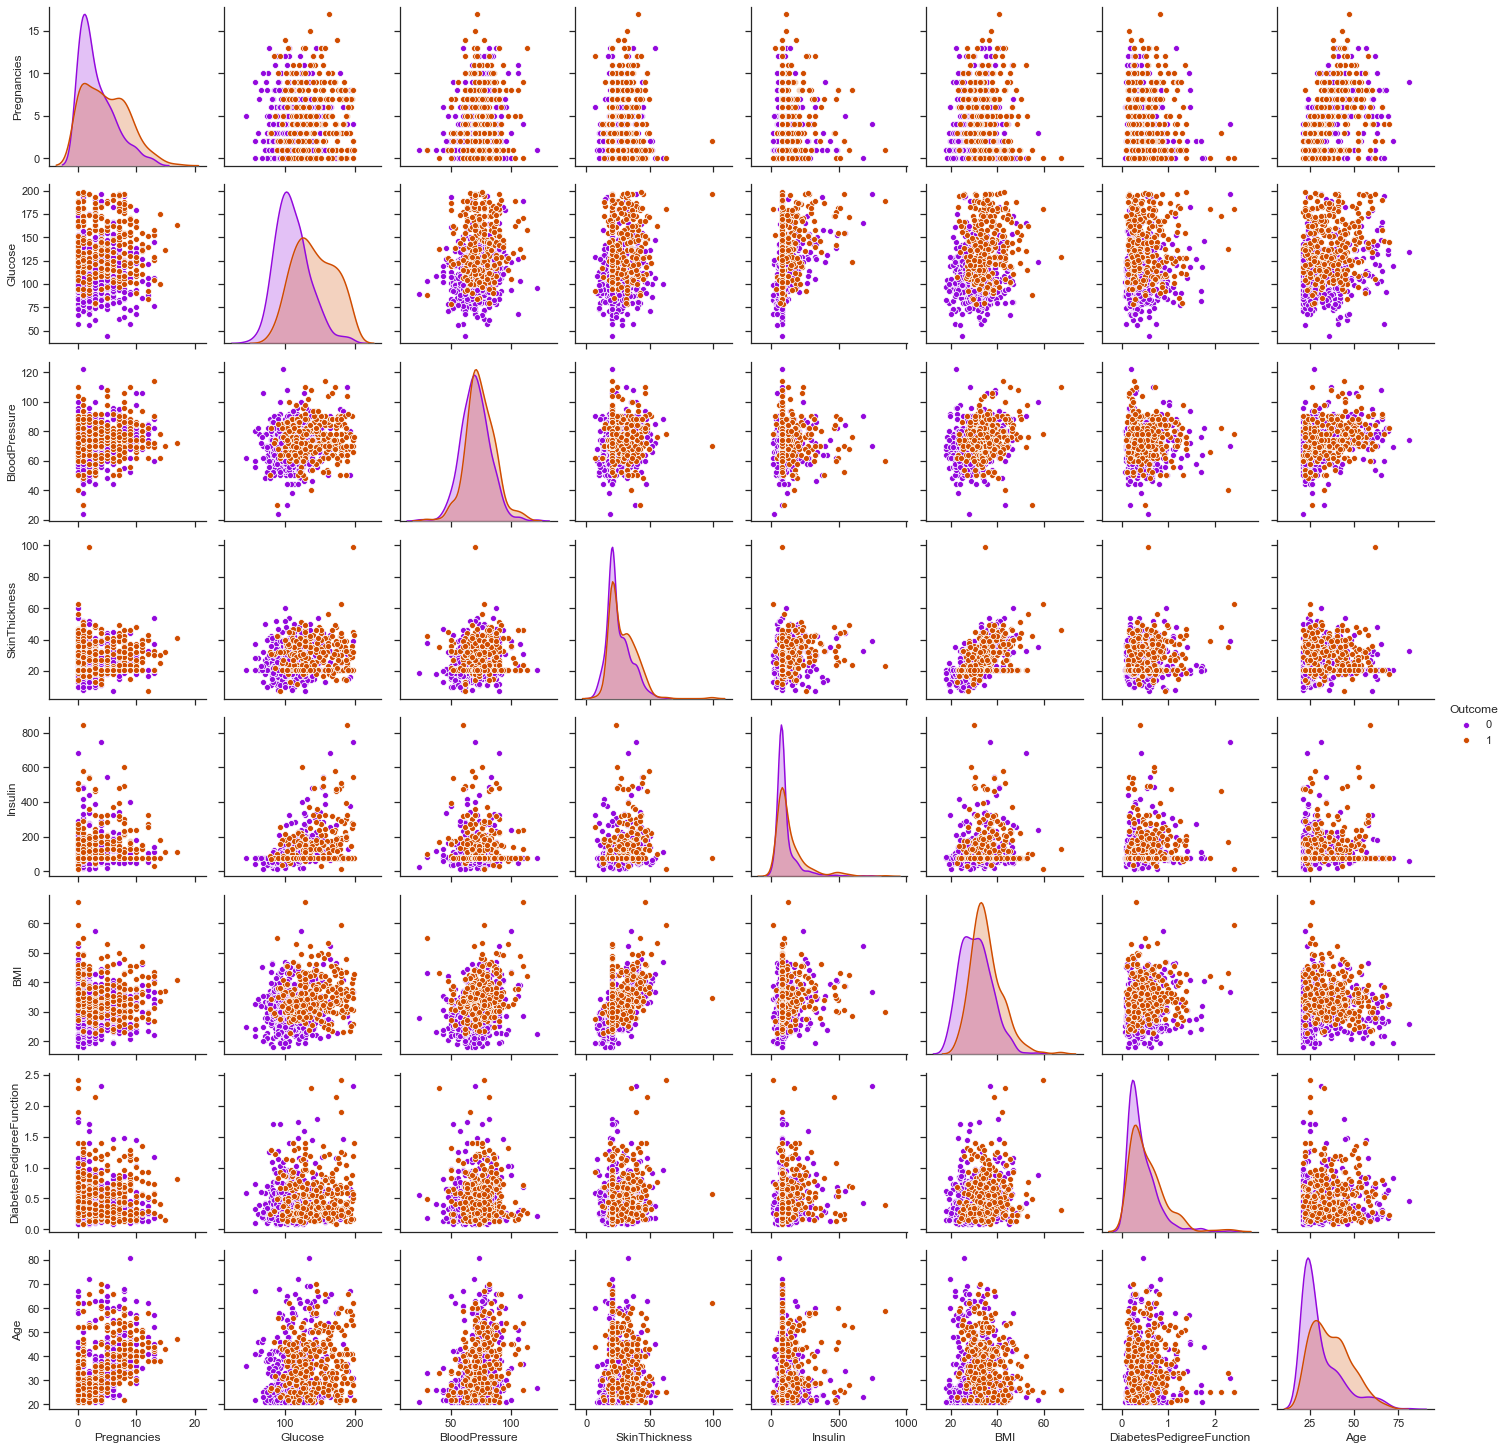

In [77]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,hue='Outcome',palette='gnuplot');

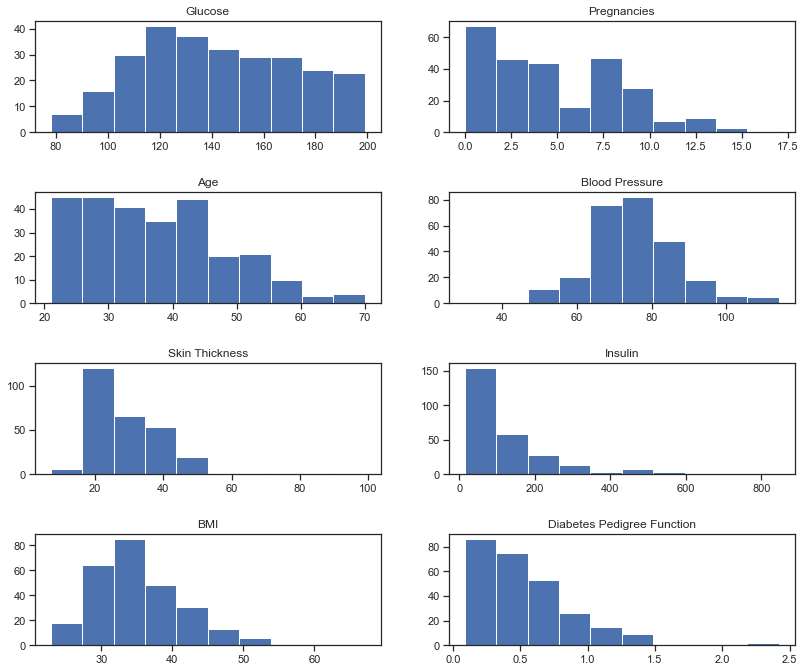

In [78]:
# Histogram of all coloumns when the Outcome is 1(Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(data.Age[data.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(data.BloodPressure[data.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(data.SkinThickness[data.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(data.Insulin[data.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);

In [79]:
#corelation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127055,0.208881,0.013785,-0.018462,0.021228,-0.034065,0.543904,0.221272
Glucose,0.127055,1.000000,0.219566,0.161378,0.396427,0.231256,0.136621,0.265811,0.492467
BloodPressure,0.208881,0.219566,1.000000,0.134188,0.010907,0.281182,0.000257,0.326698,0.162868
SkinThickness,0.013785,0.161378,0.134188,1.000000,0.240686,0.535905,0.155346,0.026809,0.175467
Insulin,-0.018462,0.396427,0.010907,0.240686,1.000000,0.189716,0.157532,0.038329,0.178933
BMI,0.021228,0.231256,0.281182,0.535905,0.189716,1.000000,0.153355,0.025422,0.312095
DiabetesPedigreeFunction,-0.034065,0.136621,0.000257,0.155346,0.157532,0.153355,1.000000,0.033044,0.173478
Age,0.543904,0.265811,0.326698,0.026809,0.038329,0.025422,0.033044,1.000000,0.237725
Outcome,0.221272,0.492467,0.162868,0.175467,0.178933,0.312095,0.173478,0.237725,1.000000


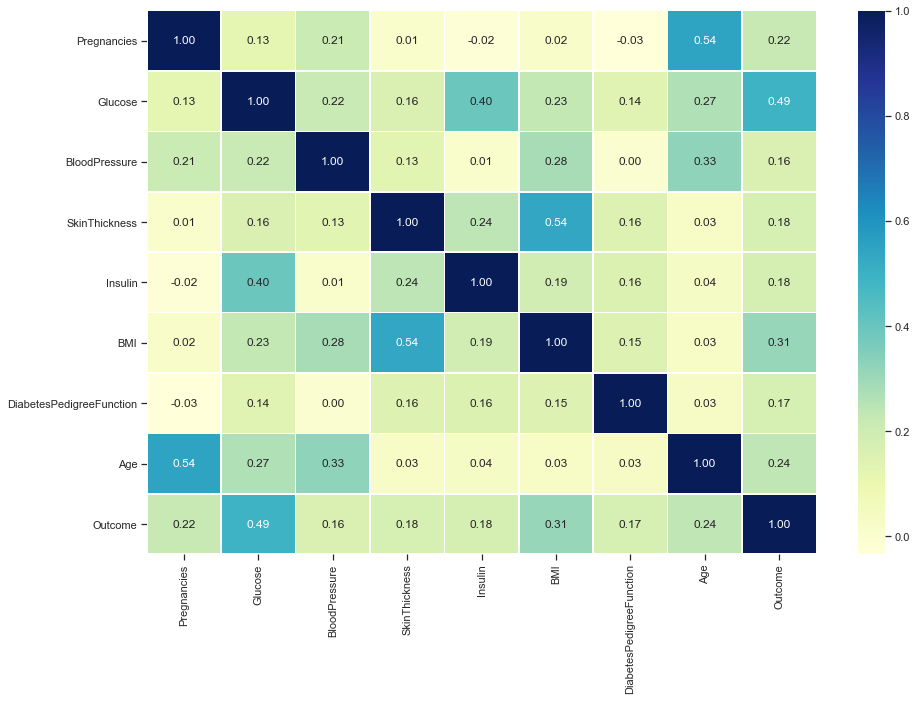

In [80]:
# make our correlation matrix visual
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

NameError: name 'sklearn' is not defined

# Modeling

In [89]:
#random data shuffelin
data.sample(frac=1)

#Spliting the data
drop = data.dro
X = data[feature_cols]

y = data['Outcome']
X_train,X_test,y_train,y_test =  train_test_split(X,
                                              y,
                                              test_size=0.2)

In [90]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)


Index(['Glucose', 'Age', 'BMI'], dtype='object')


In [91]:
(len(X_train),len(X_test))

(613, 154)

# Trying Different Models:
            ##1.Logistic Regression
            ##2.KNN
            ##3.Random Forest Classifier
            ##4.Support Vector Machine

In [36]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train);
## Evaluating the model
log_reg = log_reg.score(X_test,y_test)

In [37]:
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)

In [38]:
## Build an model (Random forest classifier)
clf= RandomForestClassifier(max_depth=2)
clf.fit(X_train,y_train);
## Evaluating the model
clf = clf.score(X_test,y_test)

In [39]:
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(X_train,y_train)
svm = svm.score(X_test,y_test)

In [40]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                           "Support Vector Machine":svm,
                            },index=["accuracy"])

In [41]:
model_compare

,Logistic Regression,KNN,Random Forest Classifier,Support Vector Machine
accuracy,0.844156,0.792208,0.805195,0.811688


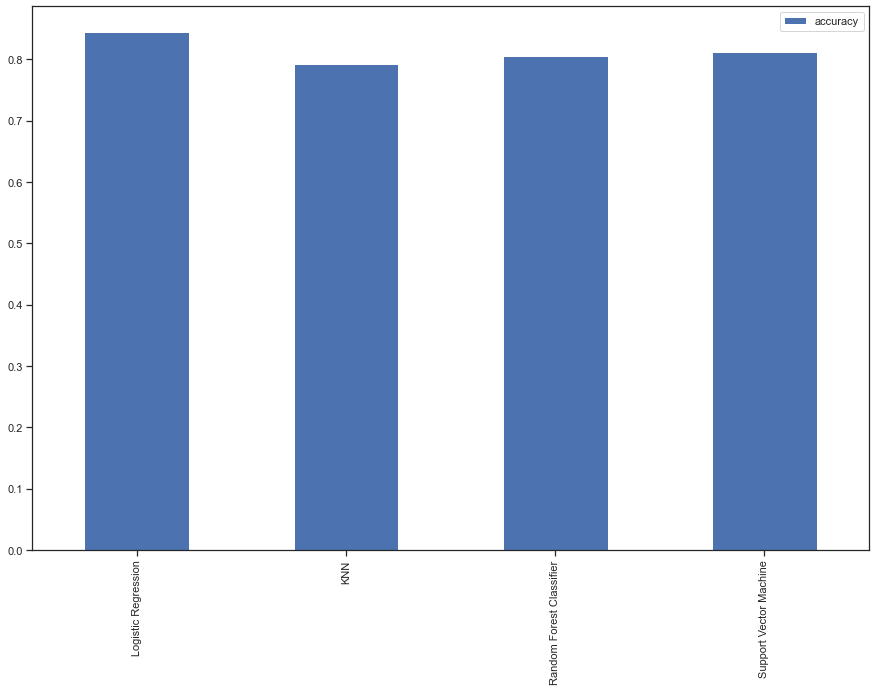

In [42]:
model_compare.T.plot.bar(figsize=(15,10));

## Hyperparameter tuning using RandomizedSearchcv


In [43]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


In [44]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [45]:
score = rs_log_reg.score(X_test,y_test)
score

0.8441558441558441

## Using Grid Search CV Logistic Regression

In [46]:
log_reg_grid = {'C': np.logspace(-4,4,30),
               "solver":["liblinear"]}

#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid search cv
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [47]:
gs_log_reg.score(X_test,y_test)

0.8441558441558441

# Best Model is logistic Regression with 83% accuracy

## Evaluating the tuned model by RandomizedSearchcv

In [48]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [49]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

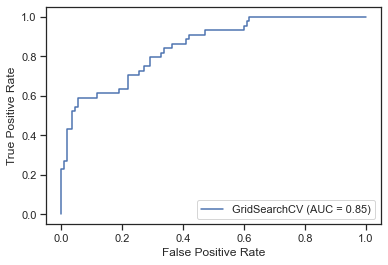

In [50]:
# plot ROC curve
plot_roc_curve(gs_log_reg,X_test,y_test)

In [51]:
#COnfusion matrix
print(confusion_matrix(y_test,y_preds))

[[104   6]
 [ 18  26]]


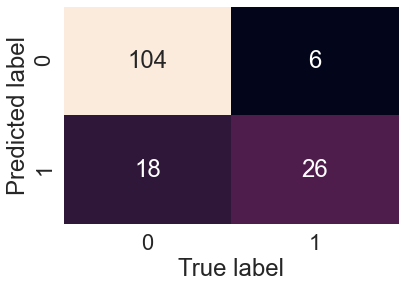

In [52]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [53]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       110
           1       0.81      0.59      0.68        44

    accuracy                           0.84       154
   macro avg       0.83      0.77      0.79       154
weighted avg       0.84      0.84      0.84       154



In [54]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 9.236708571873866, 'solver': 'liblinear'}

In [55]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [56]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="accuracy")
cv_acc

array([0.74025974, 0.75324675, 0.79220779, 0.67532468, 0.74025974,
       0.77922078, 0.77922078, 0.81578947, 0.73684211, 0.80263158])

In [57]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7615003417634997

In [58]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7670285703214093

In [59]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.4703703703703703

In [60]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.578514014536237

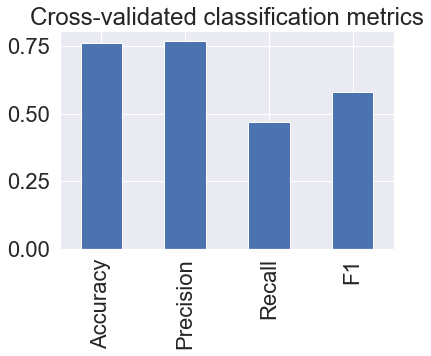

In [61]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [62]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [63]:
clf.coef_

array([[ 1.79049187e-02, -8.80070366e-03,  8.73834238e-03,
         8.34402013e-02, -7.26434585e-05]])

In [64]:
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'Pregnancies': 0.017904918745317265,
 'Glucose': -0.008800703659552392,
 'BloodPressure': 0.00873834238148165,
 'SkinThickness': 0.0834402013199406,
 'Insulin': -7.264345849815099e-05}

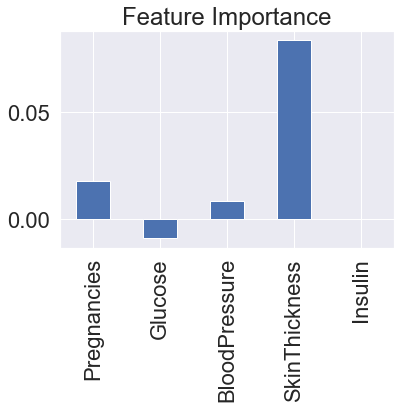

In [65]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

# Loading and Saving a model

In [68]:
import pickle

# Save trained model to file
pickle.dump(gs_log_reg, open("Diabetes1.pkl", "wb"))

In [69]:
loaded_model = pickle.load(open("Diabetes1.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)


0.8441558441558441

# Predicting the Outcome Using New data

In [53]:
## Enter the new data
X_test.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
20,3,126,88,41,235,39.3,0.704,27


In [54]:
Pregnancies = input()
Glucose = input()
BloodPressure = input()
SkinThickness = input()
Insulin = input()
BMI = input()
DiabetesPedigreeFunction = input()
Age = input()

78
45
45
45
45
45
45
45


In [55]:
row_df = pd.DataFrame([pd.Series([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI ,DiabetesPedigreeFunction ,Age])])

In [56]:
row_df

,0,1,2,3,4,5,6,7
0,78,45,45,45,45,45,45,45


In [57]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

The probability of you having Diabetes is 1.0


In [58]:
loaded_model.predict(row_df)[0]


1

## Adding the new data to the Dataset

In [59]:
#row_df.to_csv('./diabetes.csv', mode='a', header=False)